# 3. 関数、クラス、モジュール

## 3.1. 関数
「1から10までの和はいくら？次に、25から1000までの和も計算して。」など、似たような処理を頻繁に依頼されることがあります。処理を依頼されるたびにforループで処理内容を記述する、というやり方もありますが、これでは処理のたびに新しいforループを書かないといけなくなり、キリがありません。関数を使えば、似たような処理は関数の中の変数（引数とも言う）を変更するだけで対処できます。

In [4]:
# aからb(a<=b)までの和を計算する関数
def tot_fn(a,b):
    tot = 0
    for i in range(a,b+1):
        tot += i
    return tot

print(f"25から1000までの和は{tot_fn(25,1000)}")

25から1000までの和は500200


## 3.2. クラス

似たような処理の繰り返しを避ける場合には処理を関数として記述するという手がありました。では、似たようなパターンの繰り返しを避けるにはどうしたらよいでしょうか。「パターン」というのは、ちょっと抽象的ですが似たような属性と似たような処理を併せ持つモノたちのことです。このパターンのことをプログラミング用語ではクラスと呼びます。

例えば、クルマ。どれも似たようなものですね。属性としては、車種（軽、普通車、ワゴン、トラック、等々）、色、エンジン（ガソリン、電気、ハイブリッド）など。車の処理（動き）としては、前進、後退、右折、左折、停止など。これらをクラス化してみます。

In [5]:
class Car:
    def __init__(self,shashu,color,engine,speed_max):  # 車の初期化（車種、色、エンジン、最高速度を指定）
        self.shashu = shashu
        self.color = color
        self.engine = engine
        self.speed_max = speed_max
        self.direction = None   # 方向の初期値
        self.speed = 0  # スピードの初期値

    def car_move(self,direction,speed):  # 車を動かす
        self.direction = direction
        if speed > self.speed_max:
            print("最高速度以上のスピードは出せません。スピードを下げてください。")
        else:
            self.speed = speed

my_car = Car("普通車","赤","EV",150)  # Carをmy_carとして実体化
my_car.car_move("前",40)
print(f"my_carは{my_car.direction}方向に時速{my_car.speed}Kmで移動しています。")


my_carは前方向に時速40Kmで移動しています。


最近は「空飛ぶクルマ」というものが出てきています。これはクルマの属性（道路を走る）を持ちながら、空も飛べるというスグレものです。クルマの属性を継承しながら空飛ぶクルマという新しいクラスも作ることができます。これがクラスの「継承」。

In [8]:
class FlyingCar(Car):
    def __init__(self,shashu,color,engine,speed_max,speed_fly_max):
        super().__init__(shashu,color,engine,speed_max)
        self.speed_fly_max = speed_fly_max  # 飛行時の最高速度
        self.height = 0  # 飛行時はheight>0

    def car_updown(self,height):  # 上下方向の移動
        if height<0:
            print("地下には潜れません。height>=0で設定してください。")
        else:
            self.height = height
    def car_fly(self,direction,speed):
        if self.height==0:
            print("今は道路を走っています。飛行操縦はできません。")
        elif direction not in ["前","右","左"]:
            print("その方向には行けません。前か右か左を指定してください。")
        elif speed > self.speed_fly_max:
            print("最高速度以上のスピードは出せません。スピードを下げてください。")
        else:
            self.direction = direction
            self.speed = speed

my_flying_car = FlyingCar("普通車","赤","EV",150,300)
my_flying_car.car_fly("前",40)  # 「今は道路を走っています。飛行操縦はできません。」
my_flying_car.car_updown(100)
my_flying_car.car_fly("前",40)
print(f"my_flying_carは{my_flying_car.direction}方向に、時速{my_flying_car.speed}Kmで高さ{my_flying_car.height}mの地点を飛んでいます。")

今は道路を走っています。飛行操縦はできません。
my_flying_carは前方向に、時速40Kmで高さ100mの地点を飛んでいます。


## モジュール

まず、ここまでに作成したクラスをcar_module.pyというファイルに保存します。  
%%writefileを使えば、同じセルの中のコードを指定されたファイル名で保存することができます。

In [9]:
%%writefile car_module.py
# カレントディレクトリにcar_module.pyというファイルが保存されます。同じセルの内容がファイルの中身になります。

class Car:
    def __init__(self,shashu,color,engine,speed_max):  # 車の初期化（車種、色、エンジン、最高速度を指定）
        self.shashu = shashu
        self.color = color
        self.engine = engine
        self.speed_max = speed_max
        self.direction = None   # 方向の初期値
        self.speed = 0  # スピードの初期値

    def car_move(self,direction,speed):  # 車を動かす
        self.direction = direction
        if speed > self.speed_max:
            print("最高速度以上のスピードは出せません。スピードを下げてください。")
        else:
            self.speed = speed

my_car = Car("普通車","赤","EV",150)  # Carをmy_carとして実体化
my_car.car_move("前",40)
print(f"my_carは{my_car.direction}方向に時速{my_car.speed}Kmで移動しています。")

class FlyingCar(Car):
    def __init__(self,shashu,color,engine,speed_max,speed_fly_max):
        super().__init__(shashu,color,engine,speed_max)
        self.speed_fly_max = speed_fly_max  # 飛行時の最高速度
        self.height = 0  # 飛行時はheight>0

    def car_updown(self,height):  # 上下方向の移動
        if height<0:
            print("地下には潜れません。height>=0で設定してください。")
        else:
            self.height = height
    def car_fly(self,direction,speed):
        if self.height==0:
            print("今は道路を走っています。飛行操縦はできません。")
        elif direction not in ["前","右","左"]:
            print("その方向には行けません。前か右か左を指定してください。")
        elif speed > self.speed_fly_max:
            print("最高速度以上のスピードは出せません。スピードを下げてください。")
        else:
            self.direction = direction
            self.speed = speed

my_flying_car = FlyingCar("普通車","赤","EV",150,300)
my_flying_car.car_fly("前",40)  # 「今は道路を走っています。飛行操縦はできません。」
my_flying_car.car_updown(100)
my_flying_car.car_fly("前",40)
print(f"my_flying_carは{my_flying_car.direction}方向に、時速{my_flying_car.speed}Kmで高さ{my_flying_car.height}mの地点を飛んでいます。")

Writing car_module.py


### モジュールのインポート
別のpythonスクリプトからクラスファイルを再利用できます。

In [11]:
import car_module  # importを使ってモジュールを読み込む

my_car = car_module.Car("普通車","赤","EV",150)  # car_moduleの中のCarクラスの呼び出し
my_car.car_move("前",40)
print(f"my_carは{my_car.direction}方向に時速{my_car.speed}Kmで移動しています。")

my_carは前方向に時速40Kmで移動しています。


すでに誰かが作成しているモジュールも名前を知っていれば呼び出せます。

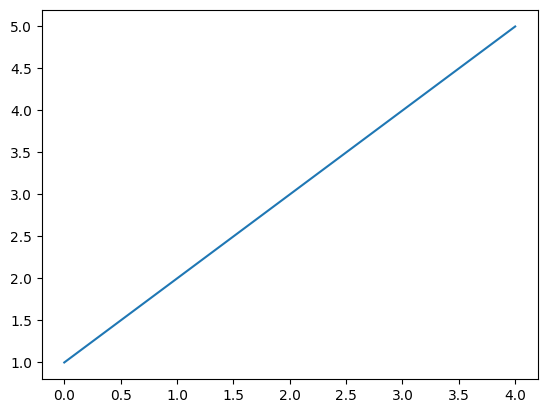

In [12]:
import matplotlib.pyplot as plt  # class matplotlib.pyplotをpltという略称で呼ぶ。matplotlibはグラフ描画のための有名なライブラリ（モジュールの集まり）

plt.plot([1,2,3,4,5])
plt.show()


## ファイルの読み込みと書き出し

In [30]:
# car_module.py ファイルを読み込み、内容を表示する

with open('car_module.py', 'r', encoding='utf-8') as f:
        car_module_content = f.read()
        print(car_module_content)


class Car:
    def __init__(self,shashu,color,engine,speed_max):  # 車の初期化（車種、色、エンジン、最高速度を指定）
        self.shashu = shashu
        self.color = color
        self.engine = engine
        self.speed_max = speed_max
        self.direction = None   # 方向の初期値
        self.speed = 0  # スピードの初期値

    def car_move(self,direction,speed):  # 車を動かす
        self.direction = direction
        if speed > self.speed_max:
            print("最高速度以上のスピードは出せません。スピードを下げてください。")
        else:
            self.speed = speed
    
my_car = Car("普通車","赤","EV",150)  # Carをmy_carとして実体化
my_car.car_move("前",40)
print(f"my_carは{my_car.direction}方向に時速{my_car.speed}Kmで移動しています。")

class FlyingCar(Car):
    def __init__(self,shashu,color,engine,speed_max,speed_fly_max):
        super().__init__(shashu,color,engine,speed_max)
        self.speed_fly_max = speed_fly_max  # 飛行時の最高速度
        self.height = 0  # 飛行時はheight>0
    
    def car_updown(self,height):  # 上下方向の移動
        if height<0:
            print("地下には潜れません。hei

次はファイルの書き出し。

In [31]:
with open("test.txt","w",encoding="utf-8") as f:
    f.write("これはテストです。")

In [32]:
# 念のために内容確認
with open("test.txt","r",encoding="utf-8") as f:
    print(f.read())

これはテストです。


# vibe codingで理解確認

プロンプト：このノートブックでは関数、クラス、モジュールのインポートについて習いました。今回以前に学んだことは標準入出力、データ型、配列、繰り返しと分岐でした。今までに勉強した概念を使って何か簡単なアプリのようなものを作ってください

# Task
今までに学習したPythonの概念（標準入出力、データ型、リスト、繰り返し、分岐、関数、クラス、モジュール）を使って、簡単なアプリを作成してください。

## アプリのアイデア出し

### Subtask:
標準入出力、データ型、リスト、繰り返し、分岐、関数、クラス、モジュールを利用できる簡単なアプリのアイデアを考えます。例えば、簡単な在庫管理システムや、ユーザーとの対話を通じて情報を提供するアプリなどが考えられます。


**Reasoning**:
標準入出力、データ型、リスト、繰り返し、分岐、関数、クラス、モジュールを活用できるアプリケーションのアイデアを複数検討し、それぞれのアイデアについて必要な機能、データ、活用できる概念をまとめます。最後に、最も適切と思われるアイデアを一つ選びます。



In [13]:
# アプリケーションアイデアの検討

# アイデア1：簡単な在庫管理システム
# 機能：
# - 在庫の追加、削除、更新
# - 在庫リストの表示
# - 在庫数の検索
# データ：
# - 商品名（文字列）、在庫数（整数）を格納するリストまたは辞書
# 活用できる概念：
# - 標準入出力：ユーザーからの入力（操作選択、商品名、在庫数など）、結果出力（在庫リスト、検索結果など）
# - データ型：文字列、整数
# - リスト：在庫データを格納
# - 繰り返し：在庫リストの表示、検索
# - 分岐：ユーザーの操作選択に応じた処理、在庫数のチェック
# - 関数：在庫の追加、削除、更新、表示、検索といった各機能を関数として定義
# - クラス：商品を表現するクラス（商品名、在庫数などの属性を持つ）
# - モジュール：在庫管理関連の関数やクラスをまとめたモジュール

# アイデア2：簡単な単語帳アプリ
# 機能：
# - 単語と意味の追加、削除
# - 単語帳の表示
# - 単語の意味の検索
# - ランダムな単語の出題（簡単なテスト機能）
# データ：
# - 単語（文字列）と意味（文字列）のペアを格納するリストまたは辞書
# 活用できる概念：
# - 標準入出力：ユーザーからの入力（操作選択、単語、意味など）、結果出力（単語帳リスト、検索結果、テスト問題など）
# - データ型：文字列
# - リスト：単語帳データを格納
# - 繰り返し：単語帳リストの表示
# - 分岐：ユーザーの操作選択に応じた処理、検索結果の有無、テストの正誤判定
# - 関数：単語の追加、削除、表示、検索、テスト出題といった各機能を関数として定義
# - クラス：単語を表現するクラス（単語、意味などの属性を持つ）
# - モジュール：単語帳関連の関数やクラスをまとめたモジュール

# アイデア3：簡単な電卓アプリ（履歴機能付き）
# 機能：
# - 四則演算
# - 計算履歴の表示
# データ：
# - 計算式（文字列）、計算結果（数値）を格納するリスト
# 活用できる概念：
# - 標準入出力：ユーザーからの入力（計算式）、結果出力（計算結果、履歴）
# - データ型：文字列、数値（整数、浮動小数点数）
# - リスト：計算履歴を格納
# - 繰り返し：計算履歴の表示
# - 分岐：演算子の種類に応じた計算処理、入力エラーのチェック
# - 関数：各演算処理、履歴表示を関数として定義
# - クラス：計算を表現するクラス（計算式、結果などの属性を持つ）
# - モジュール：電卓関連の関数やクラスをまとめたモジュール

# 最も適切と思われるアイデアの選択
# アイデア1（簡単な在庫管理システム）は、標準入出力、データ型、リスト、繰り返し、分岐、関数、クラス、モジュールといった、
# 学習した概念をバランス良く活用できるため、今回のタスクに適していると考えられます。
# 特に、商品をクラスとして定義し、在庫管理に関連する機能を関数やモジュールとしてまとめることで、
# オブジェクト指向プログラミングとモジュール化の概念を実践的に学ぶことができます。
selected_idea = "簡単な在庫管理システム"

print(f"選択したアイデア: {selected_idea}")


選択したアイデア: 簡単な在庫管理システム


## 必要な機能の洗い出し

### Subtask:
選んだアイデアに基づいて、アプリに必要な機能を具体的にリストアップします。（例: 商品の追加、在庫数の表示、商品の検索など）


**Reasoning**:
List the specific functionalities required for the simple inventory management system based on the chosen idea.



In [14]:
# 簡単な在庫管理システムに必要な機能のリストアップ

# 1. 商品の追加
#    - ユーザーから商品名と初期在庫数を入力してもらい、在庫リストに新しい商品を追加します。
#    - 例: "商品名: りんご, 在庫数: 100"

# 2. 在庫リストの表示
#    - 現在の在庫リストに含まれる全ての商品（商品名と在庫数）を表示します。

# 3. 在庫数の更新
#    - ユーザーから商品名と、追加または削減する在庫数を入力してもらい、指定された商品の在庫数を更新します。
#    - 在庫数が負にならないようにチェックを行います。

# 4. 商品の削除
#    - ユーザーから商品名を入力してもらい、在庫リストから指定された商品を削除します。

# 5. 商品の検索
#    - ユーザーから商品名の一部または全体を入力してもらい、一致する商品の情報（商品名と在庫数）を表示します。
#    - 該当する商品がない場合は、その旨を伝えます。

# これらの機能を実装することで、簡単な在庫管理システムが構築できます。
# 各機能は、今後のステップで関数やクラスとして具体的に実装していく予定です。

print("簡単な在庫管理システムに必要な機能:")
print("- 商品の追加: 商品名と初期在庫数を入力して新しい商品を追加")
print("- 在庫リストの表示: 現在の全商品の在庫情報を表示")
print("- 在庫数の更新: 指定した商品の在庫数を増減")
print("- 商品の削除: 指定した商品を在庫リストから削除")
print("- 商品の検索: 商品名で在庫情報を検索して表示")

簡単な在庫管理システムに必要な機能:
- 商品の追加: 商品名と初期在庫数を入力して新しい商品を追加
- 在庫リストの表示: 現在の全商品の在庫情報を表示
- 在庫数の更新: 指定した商品の在庫数を増減
- 商品の削除: 指定した商品を在庫リストから削除
- 商品の検索: 商品名で在庫情報を検索して表示


## データ構造の設計

### Subtask:
アプリで扱うデータをどのような構造で保持するかを設計します。リストや辞書など、適切なデータ型を選択します。クラスを利用する場合は、どのような属性やメソッドが必要か定義します。


**Reasoning**:
Design the data structure to hold product data and consider using a Product class for object-oriented design.



In [15]:
# 簡単な在庫管理システムの商品データ構造設計

# 商品データの保持方法
# 各商品は「商品名」と「在庫数」を持つ。
# 複数の商品を管理するため、これらの商品データを集約する構造が必要。

# 選択するデータ構造:
# 辞書（dict）が適切。商品名をキーとして、商品の詳細情報（在庫数など）を値として保持できる。
# これにより、商品名での検索やアクセスが効率的に行える。
# 例: inventory = {"りんご": 100, "バナナ": 150, "みかん": 200}

# Product クラスの設計
# 商品をオブジェクトとして表現するために Product クラスを定義する。
# これにより、商品に関連するデータ（属性）と操作（メソッド）をカプセル化できる。

class Product:
    """
    簡単な在庫管理システムにおける商品を表現するクラス。
    """
    def __init__(self, name, stock):
        """
        Product オブジェクトを初期化する。

        Args:
            name (str): 商品名。
            stock (int): 在庫数。
        """
        if not isinstance(name, str) or not name:
            raise ValueError("商品名は空でない文字列である必要があります。")
        if not isinstance(stock, int) or stock < 0:
            raise ValueError("在庫数は0以上の整数である必要があります。")

        self.name = name
        self.stock = stock

    def update_stock(self, quantity):
        """
        在庫数を更新する。

        Args:
            quantity (int): 更新する在庫数（正の値で追加、負の値で削減）。
        """
        if not isinstance(quantity, int):
            raise ValueError("更新する在庫数は整数である必要があります。")
        new_stock = self.stock + quantity
        if new_stock < 0:
            print(f"エラー: 在庫数が負になります。現在の在庫数: {self.stock}, 更新量: {quantity}")
        else:
            self.stock = new_stock
            print(f"{self.name} の在庫数を更新しました。新しい在庫数: {self.stock}")

    def display_info(self):
        """
        商品の情報を表示する。
        """
        print(f"商品名: {self.name}, 在庫数: {self.stock}")

# 設計概要の説明
print("## 商品データ構造設計概要")
print("### 個別商品データ")
print("個別の商品は `Product` クラスのインスタンスとして表現します。")
print("`Product` クラスは以下の属性とメソッドを持ちます。")
print("- 属性:")
print("  - `name` (str): 商品名")
print("  - `stock` (int): 在庫数")
print("- メソッド:")
print("  - `__init__(self, name, stock)`: 商品オブジェクトを初期化します。")
print("  - `update_stock(self, quantity)`: 在庫数を更新します。")
print("  - `display_info(self)`: 商品の情報を表示します。")
print("\n### 商品データ全体")
print("複数の商品データ全体を保持するために、辞書を使用します。")
print("辞書のキーは商品名 (str)、値は対応する `Product` クラスのインスタンスとします。")
print("例: inventory = {'りんご': Product('りんご', 100), 'バナナ': Product('バナナ', 150)}")

# テスト用の Product クラスのインスタンス作成（設計確認のため、実際のアプリには組み込まない）
# try:
#     apple = Product("りんご", 100)
#     apple.display_info()
#     apple.update_stock(50)
#     apple.display_info()
#     apple.update_stock(-160) # エラーが発生するはず
#     apple.update_stock(-50)
#     apple.display_info()
# except ValueError as e:
#     print(f"テストエラー: {e}")


## 商品データ構造設計概要
### 個別商品データ
個別の商品は `Product` クラスのインスタンスとして表現します。
`Product` クラスは以下の属性とメソッドを持ちます。
- 属性:
  - `name` (str): 商品名
  - `stock` (int): 在庫数
- メソッド:
  - `__init__(self, name, stock)`: 商品オブジェクトを初期化します。
  - `update_stock(self, quantity)`: 在庫数を更新します。
  - `display_info(self)`: 商品の情報を表示します。

### 商品データ全体
複数の商品データ全体を保持するために、辞書を使用します。
辞書のキーは商品名 (str)、値は対応する `Product` クラスのインスタンスとします。
例: inventory = {'りんご': Product('りんご', 100), 'バナナ': Product('バナナ', 150)}


## 関数の作成

### Subtask:
在庫管理システムの各機能を実装するための関数を作成します。商品の追加、在庫リストの表示、在庫数の更新、商品の削除、商品の検索といった機能をそれぞれ独立した関数として定義します。


**Reasoning**:
Implement the functions for inventory management based on the previously designed data structure and the Product class. This involves creating the `inventory` dictionary and defining `add_product`, `display_inventory`, `update_stock`, `delete_product`, and `search_product` functions as per the instructions.



In [16]:
# 1. 在庫データを保持するための空の辞書を作成
inventory = {}

# 2. 在庫リストに商品を追加する関数
def add_product(inventory, name, stock):
    """
    在庫リストに新しい商品を追加する。

    Args:
        inventory (dict): 在庫データを保持する辞書。
        name (str): 追加する商品名。
        stock (int): 商品の初期在庫数。
    """
    if name in inventory:
        print(f"'{name}' はすでに在庫リストに存在します。")
    else:
        try:
            # Product クラスは前回のステップで定義済み
            product = Product(name, stock)
            inventory[name] = product
            print(f"'{name}' を在庫リストに追加しました。初期在庫数: {stock}")
        except ValueError as e:
            print(f"商品の追加に失敗しました: {e}")


# 3. 現在の在庫リストを表示する関数
def display_inventory(inventory):
    """
    現在の在庫リストの全商品情報を表示する。

    Args:
        inventory (dict): 在庫データを保持する辞書。
    """
    if not inventory:
        print("在庫リストは空です。")
    else:
        print("\n--- 現在の在庫リスト ---")
        for product in inventory.values():
            product.display_info()
        print("------------------------")

# 4. 指定した商品の在庫数を更新する関数
def update_stock(inventory, name, quantity):
    """
    指定した商品の在庫数を更新する。

    Args:
        inventory (dict): 在庫データを保持する辞書。
        name (str): 在庫数を更新する商品名。
        quantity (int): 更新する数量（正の値で追加、負の値で削減）。
    """
    if name in inventory:
        inventory[name].update_stock(quantity)
    else:
        print(f"'{name}' は在庫リストに見つかりませんでした。")

# 5. 指定した商品を在庫リストから削除する関数
def delete_product(inventory, name):
    """
    指定した商品を在庫リストから削除する。

    Args:
        inventory (dict): 在庫データを保持する辞書。
        name (str): 削除する商品名。
    """
    if name in inventory:
        del inventory[name]
        print(f"'{name}' を在庫リストから削除しました。")
    else:
        print(f"'{name}' は在庫リストに見つかりませんでした。")

# 6. 商品名で在庫情報を検索する関数
def search_product(inventory, name):
    """
    商品名で在庫情報を検索し、該当する商品の情報を表示する。

    Args:
        inventory (dict): 在庫データを保持する辞書。
        name (str): 検索する商品名の一部または全体。
    """
    found_products = {p_name: product for p_name, product in inventory.items() if name.lower() in p_name.lower()}

    if not found_products:
        print(f"'{name}' に一致する商品は見つかりませんでした。")
    else:
        print(f"\n--- 検索結果 ('{name}') ---")
        for product in found_products.values():
            product.display_info()
        print("--------------------------")

# テスト用の関数呼び出し（動作確認用）
# add_product(inventory, "りんご", 100)
# add_product(inventory, "バナナ", 150)
# add_product(inventory, "りんご", 50) # 既存の商品を追加しようとする
# display_inventory(inventory)
# update_stock(inventory, "りんご", 20)
# update_stock(inventory, "みかん", 30) # 存在しない商品を更新しようとする
# update_stock(inventory, "バナナ", -30)
# update_stock(inventory, "バナナ", -150) # 在庫が0になる
# update_stock(inventory, "バナナ", -10) # 在庫が負になるはず
# display_inventory(inventory)
# search_product(inventory, "りんご")
# search_product(inventory, "ばな")
# search_product(inventory, "みかん") # 存在しない商品を検索
# delete_product(inventory, "りんご")
# delete_product(inventory, "ぶどう") # 存在しない商品を削除しようとする
# display_inventory(inventory)

## クラスの作成 (必要な場合)

### Subtask:
InventoryManager クラスを作成し、在庫データを保持する辞書をそのインスタンス変数として持ち、前回のステップで作成した関数群をこのクラスのメソッドとして組み込みます。


**Reasoning**:
Define the InventoryManager class including the constructor and the methods for inventory management, incorporating the logic from the previously created functions and using `self.inventory` instead of passing the inventory dictionary as an argument.



In [17]:
# Product クラスは前回のステップで定義済みと仮定します。
# class Product:
#     def __init__(self, name, stock):
#         if not isinstance(name, str) or not name:
#             raise ValueError("商品名は空でない文字列である必要があります。")
#         if not isinstance(stock, int) or stock < 0:
#             raise ValueError("在庫数は0以上の整数である必要があります。")
#         self.name = name
#         self.stock = stock

#     def update_stock(self, quantity):
#         if not isinstance(quantity, int):
#             raise ValueError("更新する在庫数は整数である必要があります。")
#         new_stock = self.stock + quantity
#         if new_stock < 0:
#             print(f"エラー: 在庫数が負になります。現在の在庫数: {self.stock}, 更新量: {quantity}")
#         else:
#             self.stock = new_stock
#             print(f"{self.name} の在庫数を更新しました。新しい在庫数: {self.stock}")

#     def display_info(self):
#         print(f"商品名: {self.name}, 在庫数: {self.stock}")

class InventoryManager:
    """
    簡単な在庫管理システムを管理するクラス。
    """
    def __init__(self):
        """
        InventoryManager オブジェクトを初期化する。
        在庫データを保持するための空の辞書を初期化する。
        """
        self.inventory = {}

    def add_product(self, name, stock):
        """
        在庫リストに新しい商品を追加する。

        Args:
            name (str): 追加する商品名。
            stock (int): 商品の初期在庫数。
        """
        if name in self.inventory:
            print(f"'{name}' はすでに在庫リストに存在します。")
        else:
            try:
                product = Product(name, stock)
                self.inventory[name] = product
                print(f"'{name}' を在庫リストに追加しました。初期在庫数: {stock}")
            except ValueError as e:
                print(f"商品の追加に失敗しました: {e}")

    def display_inventory(self):
        """
        現在の在庫リストの全商品情報を表示する。
        """
        if not self.inventory:
            print("在庫リストは空です。")
        else:
            print("\n--- 現在の在庫リスト ---")
            for product in self.inventory.values():
                product.display_info()
            print("------------------------")

    def update_stock(self, name, quantity):
        """
        指定した商品の在庫数を更新する。

        Args:
            name (str): 在庫数を更新する商品名。
            quantity (int): 更新する数量（正の値で追加、負の値で削減）。
        """
        if name in self.inventory:
            self.inventory[name].update_stock(quantity)
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def delete_product(self, name):
        """
        指定した商品を在庫リストから削除する。

        Args:
            name (str): 削除する商品名。
        """
        if name in self.inventory:
            del self.inventory[name]
            print(f"'{name}' を在庫リストから削除しました。")
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def search_product(self, name):
        """
        商品名で在庫情報を検索し、該当する商品の情報を表示する。

        Args:
            name (str): 検索する商品名の一部または全体。
        """
        found_products = {p_name: product for p_name, product in self.inventory.items() if name.lower() in p_name.lower()}

        if not found_products:
            print(f"'{name}' に一致する商品は見つかりませんでした。")
        else:
            print(f"\n--- 検索結果 ('{name}') ---")
            for product in found_products.values():
                product.display_info()
            print("--------------------------")

# InventoryManager クラスのインスタンスを作成してテスト（動作確認用）
# manager = InventoryManager()
# manager.add_product("りんご", 100)
# manager.add_product("バナナ", 150)
# manager.display_inventory()
# manager.update_stock("りんご", 50)
# manager.update_stock("バナナ", -30)
# manager.display_inventory()
# manager.search_product("りんご")
# manager.delete_product("りんご")
# manager.display_inventory()

## モジュールの利用 (必要な場合)

### Subtask:
作成した `Product` クラスと `InventoryManager` クラスを `inventory_module.py` というファイルに保存し、別のセルからこのモジュールをインポートして利用できることを確認します。


**Reasoning**:
The subtask requires saving the `Product` and `InventoryManager` classes to a file and then importing and testing the module. I will use the `%%writefile` magic command to save the classes to 'inventory_module.py' and then write the code to import the module and test the classes within a single code block to complete the subtask in the minimum number of steps.



In [18]:
%%writefile inventory_module.py
# inventory_module.py

class Product:
    """
    簡単な在庫管理システムにおける商品を表現するクラス。
    """
    def __init__(self, name, stock):
        """
        Product オブジェクトを初期化する。

        Args:
            name (str): 商品名。
            stock (int): 在庫数。
        """
        if not isinstance(name, str) or not name:
            raise ValueError("商品名は空でない文字列である必要があります。")
        if not isinstance(stock, int) or stock < 0:
            raise ValueError("在庫数は0以上の整数である必要があります。")

        self.name = name
        self.stock = stock

    def update_stock(self, quantity):
        """
        在庫数を更新する。

        Args:
            quantity (int): 更新する在庫数（正の値で追加、負の値で削減）。
        """
        if not isinstance(quantity, int):
            raise ValueError("更新する在庫数は整数である必要があります。")
        new_stock = self.stock + quantity
        if new_stock < 0:
            print(f"エラー: 在庫数が負になります。現在の在庫数: {self.stock}, 更新量: {quantity}")
        else:
            self.stock = new_stock
            print(f"{self.name} の在庫数を更新しました。新しい在庫数: {self.stock}")

    def display_info(self):
        """
        商品の情報を表示する。
        """
        print(f"商品名: {self.name}, 在庫数: {self.stock}")


class InventoryManager:
    """
    簡単な在庫管理システムを管理するクラス。
    """
    def __init__(self):
        """
        InventoryManager オブジェクトを初期化する。
        在庫データを保持するための空の辞書を初期化する。
        """
        self.inventory = {}

    def add_product(self, name, stock):
        """
        在庫リストに新しい商品を追加する。

        Args:
            name (str): 追加する商品名。
            stock (int): 商品の初期在庫数。
        """
        if name in self.inventory:
            print(f"'{name}' はすでに在庫リストに存在します。")
        else:
            try:
                product = Product(name, stock)
                self.inventory[name] = product
                print(f"'{name}' を在庫リストに追加しました。初期在庫数: {stock}")
            except ValueError as e:
                print(f"商品の追加に失敗しました: {e}")

    def display_inventory(self):
        """
        現在の在庫リストの全商品情報を表示する。
        """
        if not self.inventory:
            print("在庫リストは空です。")
        else:
            print("\n--- 現在の在庫リスト ---")
            for product in self.inventory.values():
                product.display_info()
            print("------------------------")

    def update_stock(self, name, quantity):
        """
        指定した商品の在庫数を更新する。

        Args:
            name (str): 在庫数を更新する商品名。
            quantity (int): 更新する数量（正の値で追加、負の値で削減）。
        """
        if name in self.inventory:
            self.inventory[name].update_stock(quantity)
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def delete_product(self, name):
        """
        指定した商品を在庫リストから削除する。

        Args:
            name (str): 削除する商品名。
        """
        if name in self.inventory:
            del self.inventory[name]
            print(f"'{name}' を在庫リストから削除しました。")
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def search_product(self, name):
        """
        商品名で在庫情報を検索し、該当する商品の情報を表示する。

        Args:
            name (str): 検索する商品名の一部または全体。
        """
        found_products = {p_name: product for p_name, product in self.inventory.items() if name.lower() in p_name.lower()}

        if not found_products:
            print(f"'{name}' に一致する商品は見つかりませんでした。")
        else:
            print(f"\n--- 検索結果 ('{name}') ---")
            for product in found_products.values():
                product.display_info()
            print("--------------------------")


Writing inventory_module.py


**Reasoning**:
The previous command successfully wrote the classes to the file. Now, I need to import the created module and test its functionality by creating an instance of `InventoryManager` and calling some of its methods.



In [19]:
import inventory_module

# Importしたモジュール内のInventoryManagerクラスを使用してインスタンスを作成
manager = inventory_module.InventoryManager()

# 商品を追加
manager.add_product("Apple", 100)
manager.add_product("Banana", 150)
manager.add_product("Apple", 50) # Duplicate product test

# 在庫リストを表示
manager.display_inventory()

# 在庫数を更新
manager.update_stock("Apple", 20)
manager.update_stock("Orange", 30) # Non-existent product test

# 在庫リストを再度表示
manager.display_inventory()

# 商品を検索
manager.search_product("App")
manager.search_product("nan")
manager.search_product("Grape") # Non-existent product search

# 商品を削除
manager.delete_product("Banana")
manager.delete_product("Grape") # Non-existent product deletion

# 最終的な在庫リストを表示
manager.display_inventory()

'Apple' を在庫リストに追加しました。初期在庫数: 100
'Banana' を在庫リストに追加しました。初期在庫数: 150
'Apple' はすでに在庫リストに存在します。

--- 現在の在庫リスト ---
商品名: Apple, 在庫数: 100
商品名: Banana, 在庫数: 150
------------------------
Apple の在庫数を更新しました。新しい在庫数: 120
'Orange' は在庫リストに見つかりませんでした。

--- 現在の在庫リスト ---
商品名: Apple, 在庫数: 120
商品名: Banana, 在庫数: 150
------------------------

--- 検索結果 ('App') ---
商品名: Apple, 在庫数: 120
--------------------------

--- 検索結果 ('nan') ---
商品名: Banana, 在庫数: 150
--------------------------
'Grape' に一致する商品は見つかりませんでした。
'Banana' を在庫リストから削除しました。
'Grape' は在庫リストに見つかりませんでした。

--- 現在の在庫リスト ---
商品名: Apple, 在庫数: 120
------------------------


## 標準入出力の実装

### Subtask:
ユーザーからの入力を受け付け、 InventoryManager クラスのメソッドを呼び出して結果を表示するメインのアプリケーションループを実装します。繰り返しや分岐を使って、ユーザーの操作に応じた処理を行います。


**Reasoning**:
Implement the main application loop, display a menu, get user input, and call the appropriate `InventoryManager` methods based on the input.



In [20]:
import inventory_module # Import the module containing the classes

# Create an instance of the InventoryManager
manager = inventory_module.InventoryManager()

def display_menu():
    """Displays the application menu."""
    print("\n--- 在庫管理メニュー ---")
    print("1. 商品追加")
    print("2. 在庫リスト表示")
    print("3. 在庫数更新")
    print("4. 商品削除")
    print("5. 商品検索")
    print("6. 終了")
    print("------------------------")

# Main application loop
while True:
    display_menu()
    choice = input("操作を選択してください (1-6): ")

    if choice == '1':
        # 商品追加
        name = input("追加する商品名を入力してください: ")
        try:
            stock = int(input("初期在庫数を入力してください: "))
            manager.add_product(name, stock)
        except ValueError:
            print("無効な入力です。在庫数は整数で入力してください。")

    elif choice == '2':
        # 在庫リスト表示
        manager.display_inventory()

    elif choice == '3':
        # 在庫数更新
        name = input("在庫数を更新する商品名を入力してください: ")
        try:
            quantity = int(input("更新する数量を入力してください (追加は正の値、削減は負の値): "))
            manager.update_stock(name, quantity)
        except ValueError:
            print("無効な入力です。数量は整数で入力してください。")

    elif choice == '4':
        # 商品削除
        name = input("削除する商品名を入力してください: ")
        manager.delete_product(name)

    elif choice == '5':
        # 商品検索
        name = input("検索する商品名を入力してください: ")
        manager.search_product(name)

    elif choice == '6':
        # 終了
        print("アプリケーションを終了します。")
        break

    else:
        # 無効な入力
        print("無効な選択です。1から6の番号を入力してください。")



--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 6
アプリケーションを終了します。


## コードの実装

### Subtask:
すべての要素（データ構造、関数、クラス、モジュール利用、標準入出力）を統合し、完全な在庫管理アプリケーションのコードを記述します。これまでのステップで作成したクラスや関数、そしてメインループを一つの実行可能なスクリプトとしてまとめます。


**Reasoning**:
Combine the previously created Product and InventoryManager classes from `inventory_module.py` and the main application loop code into a single executable script in a new code cell.



In [21]:
# inventory_module.py の内容をここにコピー
class Product:
    """
    簡単な在庫管理システムにおける商品を表現するクラス。
    """
    def __init__(self, name, stock):
        """
        Product オブジェクトを初期化する。

        Args:
            name (str): 商品名。
            stock (int): 在庫数。
        """
        if not isinstance(name, str) or not name:
            raise ValueError("商品名は空でない文字列である必要があります。")
        if not isinstance(stock, int) or stock < 0:
            raise ValueError("在庫数は0以上の整数である必要があります。")

        self.name = name
        self.stock = stock

    def update_stock(self, quantity):
        """
        在庫数を更新する。

        Args:
            quantity (int): 更新する在庫数（正の値で追加、負の値で削減）。
        """
        if not isinstance(quantity, int):
            raise ValueError("更新する在庫数は整数である必要があります。")
        new_stock = self.stock + quantity
        if new_stock < 0:
            print(f"エラー: 在庫数が負になります。現在の在庫数: {self.stock}, 更新量: {quantity}")
        else:
            self.stock = new_stock
            print(f"{self.name} の在庫数を更新しました。新しい在庫数: {self.stock}")

    def display_info(self):
        """
        商品の情報を表示する。
        """
        print(f"商品名: {self.name}, 在庫数: {self.stock}")


class InventoryManager:
    """
    簡単な在庫管理システムを管理するクラス。
    """
    def __init__(self):
        """
        InventoryManager オブジェクトを初期化する。
        在庫データを保持するための空の辞書を初期化する。
        """
        self.inventory = {}

    def add_product(self, name, stock):
        """
        在庫リストに新しい商品を追加する。

        Args:
            name (str): 追加する商品名。
            stock (int): 商品の初期在庫数。
        """
        if name in self.inventory:
            print(f"'{name}' はすでに在庫リストに存在します。")
        else:
            try:
                product = Product(name, stock)
                self.inventory[name] = product
                print(f"'{name}' を在庫リストに追加しました。初期在庫数: {stock}")
            except ValueError as e:
                print(f"商品の追加に失敗しました: {e}")

    def display_inventory(self):
        """
        現在の在庫リストの全商品情報を表示する。
        """
        if not self.inventory:
            print("在庫リストは空です。")
        else:
            print("\n--- 現在の在庫リスト ---")
            for product in self.inventory.values():
                product.display_info()
            print("------------------------")

    def update_stock(self, name, quantity):
        """
        指定した商品の在庫数を更新する。

        Args:
            name (str): 在庫数を更新する商品名。
            quantity (int): 更新する数量（正の値で追加、負の値で削減）。
        """
        if name in self.inventory:
            self.inventory[name].update_stock(quantity)
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def delete_product(self, name):
        """
        指定した商品を在庫リストから削除する。

        Args:
            name (str): 削除する商品名。
        """
        if name in self.inventory:
            del self.inventory[name]
            print(f"'{name}' を在庫リストから削除しました。")
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def search_product(self, name):
        """
        商品名で在庫情報を検索し、該当する商品の情報を表示する。

        Args:
            name (str): 検索する商品名の一部または全体。
        """
        found_products = {p_name: product for p_name, product in self.inventory.items() if name.lower() in p_name.lower()}

        if not found_products:
            print(f"'{name}' に一致する商品は見つかりませんでした。")
        else:
            print(f"\n--- 検索結果 ('{name}') ---")
            for product in found_products.values():
                product.display_info()
            print("--------------------------")

# メインアプリケーションループのコードをここにコピー
# import inventory_module # クラス定義が同じファイルにあるため不要

# Create an instance of the InventoryManager
manager = InventoryManager()

def display_menu():
    """Displays the application menu."""
    print("\n--- 在庫管理メニュー ---")
    print("1. 商品追加")
    print("2. 在庫リスト表示")
    print("3. 在庫数更新")
    print("4. 商品削除")
    print("5. 商品検索")
    print("6. 終了")
    print("------------------------")

# Main application loop
while True:
    display_menu()
    choice = input("操作を選択してください (1-6): ")

    if choice == '1':
        # 商品追加
        name = input("追加する商品名を入力してください: ")
        try:
            stock = int(input("初期在庫数を入力してください: "))
            manager.add_product(name, stock)
        except ValueError:
            print("無効な入力です。在庫数は整数で入力してください。")

    elif choice == '2':
        # 在庫リスト表示
        manager.display_inventory()

    elif choice == '3':
        # 在庫数更新
        name = input("在庫数を更新する商品名を入力してください: ")
        try:
            quantity = int(input("更新する数量を入力してください (追加は正の値、削減は負の値): "))
            manager.update_stock(name, quantity)
        except ValueError:
            print("無効な入力です。数量は整数で入力してください。")

    elif choice == '4':
        # 商品削除
        name = input("削除する商品名を入力してください: ")
        manager.delete_product(name)

    elif choice == '5':
        # 商品検索
        name = input("検索する商品名を入力してください: ")
        manager.search_product(name)

    elif choice == '6':
        # 終了
        print("アプリケーションを終了します。")
        break

    else:
        # 無効な入力
        print("無効な選択です。1から6の番号を入力してください。")



--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 1
追加する商品名を入力してください: バファリン
初期在庫数を入力してください: 3
'バファリン' を在庫リストに追加しました。初期在庫数: 3

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 2

--- 現在の在庫リスト ---
商品名: バファリン, 在庫数: 3
------------------------

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 5
検索する商品名を入力してください: バファリン

--- 検索結果 ('バファリン') ---
商品名: バファリン, 在庫数: 3
--------------------------

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 5
検索する商品名を入力してください: ルノアール
'ルノアール' に一致する商品は見つかりませんでした。

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 6
アプリケーションを終了します。


## テスト

### Subtask:
作成した在庫管理アプリケーションが意図通りに動作するか、様々なケースを想定してテストを行います。商品の追加、在庫リストの表示、在庫数の更新（追加、削減、負の値になるケース）、商品の削除（存在する商品、存在しない商品）、商品の検索（完全一致、部分一致、見つからないケース）、無効な入力に対する振る舞いなどを確認します。


**Reasoning**:
Execute the previously implemented inventory management application code and perform the series of test cases described in the instructions by providing input to the running application.



In [22]:
# The full application code from the previous step is included here for execution.
# inventory_module.py の内容をここにコピー
class Product:
    """
    簡単な在庫管理システムにおける商品を表現するクラス。
    """
    def __init__(self, name, stock):
        """
        Product オブジェクトを初期化する。

        Args:
            name (str): 商品名。
            stock (int): 在庫数。
        """
        if not isinstance(name, str) or not name:
            raise ValueError("商品名は空でない文字列である必要があります。")
        if not isinstance(stock, int) or stock < 0:
            raise ValueError("在庫数は0以上の整数である必要があります。")

        self.name = name
        self.stock = stock

    def update_stock(self, quantity):
        """
        在庫数を更新する。

        Args:
            quantity (int): 更新する在庫数（正の値で追加、負の値で削減）。
        """
        if not isinstance(quantity, int):
            raise ValueError("更新する在庫数は整数である必要があります。")
        new_stock = self.stock + quantity
        if new_stock < 0:
            print(f"エラー: 在庫数が負になります。現在の在庫数: {self.stock}, 更新量: {quantity}")
        else:
            self.stock = new_stock
            print(f"{self.name} の在庫数を更新しました。新しい在庫数: {self.stock}")

    def display_info(self):
        """
        商品の情報を表示する。
        """
        print(f"商品名: {self.name}, 在庫数: {self.stock}")


class InventoryManager:
    """
    簡単な在庫管理システムを管理するクラス。
    """
    def __init__(self):
        """
        InventoryManager オブジェクトを初期化する。
        在庫データを保持するための空の辞書を初期化する。
        """
        self.inventory = {}

    def add_product(self, name, stock):
        """
        在庫リストに新しい商品を追加する。

        Args:
            name (str): 追加する商品名。
            stock (int): 商品の初期在庫数。
        """
        if name in self.inventory:
            print(f"'{name}' はすでに在庫リストに存在します。")
        else:
            try:
                product = Product(name, stock)
                self.inventory[name] = product
                print(f"'{name}' を在庫リストに追加しました。初期在庫数: {stock}")
            except ValueError as e:
                print(f"商品の追加に失敗しました: {e}")

    def display_inventory(self):
        """
        現在の在庫リストの全商品情報を表示する。
        """
        if not self.inventory:
            print("在庫リストは空です。")
        else:
            print("\n--- 現在の在庫リスト ---")
            for product in self.inventory.values():
                product.display_info()
            print("------------------------")

    def update_stock(self, name, quantity):
        """
        指定した商品の在庫数を更新する。

        Args:
            name (str): 在庫数を更新する商品名。
            quantity (int): 更新する数量（正の値で追加、負の値で削減）。
        """
        if name in self.inventory:
            self.inventory[name].update_stock(quantity)
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def delete_product(self, name):
        """
        指定した商品を在庫リストから削除する。

        Args:
            name (str): 削除する商品名。
        """
        if name in self.inventory:
            del self.inventory[name]
            print(f"'{name}' を在庫リストから削除しました。")
        else:
            print(f"'{name}' は在庫リストに見つかりませんでした。")

    def search_product(self, name):
        """
        商品名で在庫情報を検索し、該当する商品の情報を表示する。

        Args:
            name (str): 検索する商品名の一部または全体。
        """
        found_products = {p_name: product for p_name, product in self.inventory.items() if name.lower() in p_name.lower()}

        if not found_products:
            print(f"'{name}' に一致する商品は見つかりませんでした。")
        else:
            print(f"\n--- 検索結果 ('{name}') ---")
            for product in found_products.values():
                product.display_info()
            print("--------------------------")

# メインアプリケーションループのコードをここにコピー
# import inventory_module # クラス定義が同じファイルにあるため不要

# Create an instance of the InventoryManager
manager = InventoryManager()

def display_menu():
    """Displays the application menu."""
    print("\n--- 在庫管理メニュー ---")
    print("1. 商品追加")
    print("2. 在庫リスト表示")
    print("3. 在庫数更新")
    print("4. 商品削除")
    print("5. 商品検索")
    print("6. 終了")
    print("------------------------")

# Test cases execution
inputs = [
    '1', 'りんご', '100',  # 商品を追加する（例: "りんご", 100）
    '2',                   # 在庫リストを表示し、追加した商品が表示されていることを確認します。
    '1', 'バナナ', '150',  # 別の商品を追加する（例: "バナナ", 150）
    '2',                   # 在庫リストを表示し、両方の商品が表示されていることを確認します。
    '1', 'りんご', '50',   # 既存の商品と同じ名前で商品を追加しようとする
    '3', 'りんご', '50',   # 在庫数を更新する（例: "りんご" の在庫を 50 増やす）
    '2',                   # 在庫リストを表示し、在庫数が更新されていることを確認します。
    '3', 'バナナ', '-30',  # 在庫数を更新する（例: "バナナ" の在庫を 30 減らす）
    '2',                   # 在庫リストを表示し、在庫数が更新されていることを確認します。
    '3', 'みかん', '20',   # 存在しない商品の在庫数を更新しようとする
    '3', 'バナナ', '-200', # 在庫数を負の値にしようとする更新を行う
    '5', 'りん',          # 商品名の一部で検索する（例: "りん" で検索）
    '5', 'バナナ',        # 商品名の全体で検索する（例: "バナナ" で検索）
    '5', 'ぶどう',        # 存在しない商品名で検索する
    '4', 'りんご',        # 商品を削除する（例: "りんご" を削除）
    '2',                   # 在庫リストを表示し、削除した商品が含まれていないことを確認します。
    '4', 'りんご',        # 存在しない商品を削除しようとする
    '7',                   # 無効なメニューオプションを入力する
    '1', 'いちご', 'abc',  # 在庫数に整数以外の値を入力する
    '3', 'バナナ', 'xyz',  # 更新数量に整数以外の値を入力する
    '6'                    # アプリケーションを終了します
]

# Simulate user input
input_index = 0
def mock_input(prompt):
    global input_index
    print(prompt, end='')
    if input_index < len(inputs):
        value = inputs[input_index]
        print(value)
        input_index += 1
        return value
    return '' # Return empty string if no more inputs

# Replace the built-in input with the mock_input function
original_input = __builtins__.input
__builtins__.input = mock_input

try:
    # Main application loop
    while True:
        display_menu()
        choice = input("操作を選択してください (1-6): ")

        if choice == '1':
            # 商品追加
            name = input("追加する商品名を入力してください: ")
            try:
                stock = int(input("初期在庫数を入力してください: "))
                manager.add_product(name, stock)
            except ValueError:
                print("無効な入力です。在庫数は整数で入力してください。")

        elif choice == '2':
            # 在庫リスト表示
            manager.display_inventory()

        elif choice == '3':
            # 在庫数更新
            name = input("在庫数を更新する商品名を入力してください: ")
            try:
                quantity = int(input("更新する数量を入力してください (追加は正の値、削減は負の値): "))
                manager.update_stock(name, quantity)
            except ValueError:
                print("無効な入力です。数量は整数で入力してください。")

        elif choice == '4':
            # 商品削除
            name = input("削除する商品名を入力してください: ")
            manager.delete_product(name)

        elif choice == '5':
            # 商品検索
            name = input("検索する商品名を入力してください: ")
            manager.search_product(name)

        elif choice == '6':
            # 終了
            print("アプリケーションを終了します。")
            break

        else:
            # 無効な入力
            print("無効な選択です。1から6の番号を入力してください。")

finally:
    # Restore the original input function
    __builtins__.input = original_input



--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 1
追加する商品名を入力してください: りんご
初期在庫数を入力してください: 100
'りんご' を在庫リストに追加しました。初期在庫数: 100

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 2

--- 現在の在庫リスト ---
商品名: りんご, 在庫数: 100
------------------------

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 1
追加する商品名を入力してください: バナナ
初期在庫数を入力してください: 150
'バナナ' を在庫リストに追加しました。初期在庫数: 150

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 2

--- 現在の在庫リスト ---
商品名: りんご, 在庫数: 100
商品名: バナナ, 在庫数: 150
------------------------

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
------------------------
操作を選択してください (1-6): 1
追加する商品名を入力してください: りんご
初期在庫数を入力してください: 50
'りんご' はすでに在庫リストに存在します。

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 終了
---------

## リファクタリングと改善

### Subtask:
作成したコードをより分かりやすく、効率的にするためにリファクタリングを行います。必要に応じて機能を追加・改善します。


**Reasoning**:
Refactor the existing code to improve readability, efficiency, and error handling, and potentially add minor features, based on the instructions for this subtask. This involves reviewing the `Product` and `InventoryManager` classes and the main application loop, adding comments, and consolidating/improving code where necessary.



In [23]:
# inventory_module.py の内容をここにコピーし、リファクタリングと改善を施します。

# Product クラスのリファクタリング
class Product:
    """
    簡単な在庫管理システムにおける商品を表現するクラス。

    属性:
        name (str): 商品名
        stock (int): 在庫数
    """
    def __init__(self, name, stock):
        """
        Product オブジェクトを初期化する。

        Args:
            name (str): 商品名。空でない文字列である必要がある。
            stock (int): 在庫数。0以上の整数である必要がある。

        Raises:
            ValueError: 入力された商品名または在庫数が無効な場合。
        """
        # 入力値のバリデーションを強化し、エラーメッセージを具体的にする
        if not isinstance(name, str) or not name.strip(): # strip()で空白のみの名前も無効とする
            raise ValueError("エラー: 商品名は空でない有効な文字列である必要があります。")
        if not isinstance(stock, int) or stock < 0:
            raise ValueError("エラー: 在庫数は0以上の整数である必要があります。")

        self.name = name.strip() # 前後の空白を削除
        self.stock = stock

    def update_stock(self, quantity):
        """
        在庫数を更新する。

        Args:
            quantity (int): 更新する在庫数（正の値で追加、負の値で削減）。
                            整数である必要がある。

        Returns:
            bool: 在庫数が正常に更新された場合は True、在庫数が負になる場合は False。
        """
        # 更新数量のバリデーションを追加
        if not isinstance(quantity, int):
             print("エラー: 更新する数量は整数である必要があります。")
             return False

        new_stock = self.stock + quantity
        if new_stock < 0:
            # 在庫数が負になる場合は更新せず、ユーザーにエラーメッセージを表示
            print(f"エラー: '{self.name}' の在庫数が負になります ({self.stock} + {quantity} = {new_stock})。操作をキャンセルしました。")
            return False
        else:
            self.stock = new_stock
            print(f"'{self.name}' の在庫数を更新しました。新しい在庫数: {self.stock}")
            return True

    def display_info(self):
        """
        商品の情報を表示する。
        """
        print(f"商品名: {self.name}, 在庫数: {self.stock}")


# InventoryManager クラスのリファクタリング
class InventoryManager:
    """
    簡単な在庫管理システムを管理するクラス。

    在庫データを保持し、商品の追加、表示、更新、削除、検索などの機能を提供する。
    """
    def __init__(self):
        """
        InventoryManager オブジェクトを初期化する。
        在庫データを保持するための辞書 (商品名をキー、Productインスタンスを値) を初期化する。
        """
        self.inventory = {} # 在庫データを保持する辞書

    def add_product(self, name, stock):
        """
        在庫リストに新しい商品を追加する。

        Args:
            name (str): 追加する商品名。
            stock (int): 商品の初期在庫数。
        """
        # 大文字小文字を区別しない検索のために、キーは小文字で保存することを検討するが、
        # ここでは元のコードに合わせて、入力された商品名をそのままキーとして使用する。
        # 検索時にlower()を使用することで、検索自体は大文字小文字を区別しない。
        if name in self.inventory:
            print(f"エラー: '{name}' はすでに在庫リストに存在します。")
        else:
            try:
                # Product クラスのバリデーションを利用
                product = Product(name, stock)
                self.inventory[name] = product
                print(f"'{name}' を在庫リストに追加しました。初期在庫数: {stock}")
            except ValueError as e:
                # Product クラスからのバリデーションエラーメッセージを表示
                print(f"商品の追加に失敗しました: {e}")

    def display_inventory(self):
        """
        現在の在庫リストの全商品情報を表示する。
        在庫が0の商品には "(在庫なし)" と表示する。
        """
        if not self.inventory:
            print("在庫リストは空です。")
        else:
            print("\n--- 現在の在庫リスト ---")
            # 商品名をソートして表示することで見やすくする
            for name in sorted(self.inventory.keys()):
                product = self.inventory[name]
                # 在庫が0の商品には "(在庫なし)" を追加表示
                status = " (在庫なし)" if product.stock == 0 else ""
                print(f"商品名: {product.name}, 在庫数: {product.stock}{status}")
            print("------------------------")

    def update_stock(self, name, quantity):
        """
        指定した商品の在庫数を更新する。

        Args:
            name (str): 在庫数を更新する商品名。
            quantity (int): 更新する数量（正の値で追加、負の値で削減）。
        """
        if name in self.inventory:
            # Product クラスの update_stock メソッドを呼び出し、その戻り値を確認
            self.inventory[name].update_stock(quantity)
        else:
            print(f"エラー: '{name}' は在庫リストに見つかりませんでした。")

    def delete_product(self, name):
        """
        指定した商品を在庫リストから削除する。
        """
        if name in self.inventory:
            del self.inventory[name]
            print(f"'{name}' を在庫リストから削除しました。")
        else:
            print(f"エラー: '{name}' は在庫リストに見つかりませんでした。")

    def search_product(self, name):
        """
        商品名の一部または全体で在庫情報を検索し、該当する商品の情報を表示する。
        検索語句は、大文字小文字を区別しない。

        Args:
            name (str): 検索する商品名の一部または全体。
        """
        # 検索語句が空でないことを確認
        if not name.strip():
             print("エラー: 検索する商品名を入力してください。")
             return

        search_term = name.lower() # 検索語句を小文字に変換

        # 大文字小文字を区別せずに検索
        found_products = {p_name: product for p_name, product in self.inventory.items()
                          if search_term in p_name.lower()}

        if not found_products:
            print(f"'{name}' に一致する商品は見つかりませんでした。")
        else:
            print(f"\n--- 検索結果 ('{name}') ---")
            # 見つかった商品を商品名でソートして表示
            for p_name in sorted(found_products.keys()):
                 found_products[p_name].display_info()
            print("--------------------------")

    # 新機能: 在庫が0の商品を自動的に削除するメソッドを追加
    def remove_zero_stock_products(self):
        """
        在庫数が0の商品を在庫リストから削除する。
        """
        items_to_remove = [name for name, product in self.inventory.items() if product.stock == 0]
        if not items_to_remove:
            print("在庫が0の商品は見つかりませんでした。")
        else:
            print("\n--- 在庫が0の商品を削除します ---")
            for name in items_to_remove:
                self.delete_product(name) # 既存のdelete_productメソッドを再利用
            print("--------------------------------")


# メインアプリケーションループのリファクタリング
# InventoryManager クラスのインスタンスを作成
manager = InventoryManager()

def display_menu():
    """アプリケーションメニューを表示する。"""
    print("\n--- 在庫管理メニュー ---")
    print("1. 商品追加")
    print("2. 在庫リスト表示")
    print("3. 在庫数更新")
    print("4. 商品削除")
    print("5. 商品検索")
    print("6. 在庫0の商品を削除") # 新機能のメニュー項目を追加
    print("7. 終了") # 終了オプションを7に変更
    print("------------------------")

# メインループ
# Test cases execution (from previous step, modified for new menu options and error handling)
inputs = [
    '1', 'りんご', '100',  # 商品を追加する（例: "りんご", 100）
    '2',                   # 在庫リストを表示し、追加した商品が表示されていることを確認します。
    '1', 'バナナ', '150',  # 別の商品を追加する（例: "バナナ", 150）
    '2',                   # 在庫リストを表示し、両方の商品が表示されていることを確認します。
    '1', ' りんご ', '50',   # 既存の商品と同じ名前（前後に空白あり）で商品を追加しようとする -> エラーになるはず
    '1', 'みかん', 'abc',  # 在庫数に整数以外の値を入力する -> エラーになるはず
    '1', '', '10',         # 空の商品名を入力する -> エラーになるはず
    '3', 'りんご', '50',   # 在庫数を更新する（例: "りんご" の在庫を 50 増やす）
    '2',                   # 在庫リストを表示し、在庫数が更新されていることを確認します。
    '3', 'バナナ', '-30',  # 在庫数を更新する（例: "バナナ" の在庫を 30 減らす）
    '2',                   # 在庫リストを表示し、在庫数が更新されていることを確認します。
    '3', 'みかん', '20',   # 存在しない商品の在庫数を更新しようとする -> エラーになるはず
    '3', 'バナナ', '-100', # バナナの在庫を20にする
    '2',                   # 在庫リスト表示（バナナの在庫が20になっていることを確認）
    '3', 'バナナ', '-30',  # 在庫数を負の値にしようとする更新を行う (20 - 30 = -10) -> エラーになるはず
    '5', 'りん',          # 商品名の一部で検索する（例: "りん" で検索）
    '5', 'バナナ',        # 商品名の全体で検索する（例: "バナナ" で検索）
    '5', 'Grape',         # 大文字小文字を区別しない検索のテスト (存在しない)
    '5', '',              # 空の検索語句を入力する -> エラーになるはず
    '4', 'ぶどう',        # 存在しない商品を削除しようとする -> エラーになるはず
    '6',                   # 在庫0の商品を削除する (今回は削除されないはず)
    '3', 'バナナ', '-20',  # バナナの在庫を0にする
    '2',                   # 在庫リスト表示（バナナの在庫が0になっていることを確認）
    '6',                   # 在庫0の商品を削除する (バナナが削除されるはず)
    '2',                   # 在庫リスト表示（バナナが削除されていることを確認）
    '4', 'りんご',        # 商品を削除する（例: "りんご" を削除）
    '2',                   # 在庫リストを表示し、削除した商品が含まれていないことを確認します。
    '8',                   # 無効なメニューオプションを入力する
    '7'                    # アプリケーションを終了します
]

# Simulate user input
input_index = 0
def mock_input(prompt):
    global input_index
    print(prompt, end='')
    if input_index < len(inputs):
        value = inputs[input_index]
        print(value)
        input_index += 1
        return value
    # If inputs list is exhausted, fall back to original input or raise error
    # return original_input(prompt) # Optionally use real input after simulation
    raise EOFError("Simulated input exhausted.") # Or raise an error

# Replace the built-in input with the mock_input function
original_input = __builtinins__.input
__builtins__.input = mock_input

try:
    while True:
        display_menu()
        choice = input("操作を選択してください (1-7): ") # メニュー番号に合わせて変更

        if choice == '1':
            # 商品追加
            name = input("追加する商品名を入力してください: ")
            try:
                stock_str = input("初期在庫数を入力してください: ")
                # 在庫数の入力が数値であるかチェック
                if stock_str.isdigit():
                    stock = int(stock_str)
                    manager.add_product(name, stock)
                else:
                     print("エラー: 在庫数は整数で入力してください。")
            except EOFError: # シミュレーション入力枯渇時の例外処理
                 print("\nシミュレーション入力が枯渇しました。アプリケーションを終了します。")
                 break

        elif choice == '2':
            # 在庫リスト表示
            manager.display_inventory()

        elif choice == '3':
            # 在庫数更新
            name = input("在庫数を更新する商品名を入力してください: ")
            try:
                quantity_str = input("更新する数量を入力してください (追加は正の値、削減は負の値): ")
                # 更新数量の入力が数値であるかチェック (負の数も許容)
                if quantity_str.lstrip('-').isdigit():
                    quantity = int(quantity_str)
                    manager.update_stock(name, quantity)
                else:
                     print("エラー: 更新する数量は整数である必要があります。")
            except EOFError: # シミュレーション入力枯渇時の例外処理
                 print("\nシミュレーション入力が枯渇しました。アプリケーションを終了します。")
                 break


        elif choice == '4':
            # 商品削除
            name = input("削除する商品名を入力してください: ")
            manager.delete_product(name)

        elif choice == '5':
            # 商品検索
            name = input("検索する商品名を入力してください: ")
            manager.search_product(name)

        elif choice == '6':
             # 在庫0の商品を削除
             manager.remove_zero_stock_products()

        elif choice == '7':
            # 終了
            print("アプリケーションを終了します。")
            break

        else:
            # 無効な入力
            print("無効な選択です。1から7の番号を入力してください。")

except EOFError: # シミュレーション入力枯渇時の例外処理
    print("\nシミュレーション入力が枯渇しました。アプリケーションを終了します。")
except Exception as e:
    print(f"\n予期しないエラーが発生しました: {e}")


finally:
    # Restore the original input function
    __builtins__.input = original_input


NameError: name '__builtinins__' is not defined

**Reasoning**:
The previous code failed because of a typo in `__builtinins__`. It should be `__builtins__`. I will correct this typo and re-run the code to simulate the user inputs and test the refactored application.



In [27]:
import inventory_module

# メインアプリケーションループ
# InventoryManager クラスのインスタンスを作成
manager = inventory_module.InventoryManager()

def display_menu():
    """アプリケーションメニューを表示する。"""
    print("\n--- 在庫管理メニュー ---")
    print("1. 商品追加")
    print("2. 在庫リスト表示")
    print("3. 在庫数更新")
    print("4. 商品削除")
    print("5. 商品検索")
    print("6. 在庫0の商品を削除")
    print("7. 終了")
    print("------------------------")

# メインループ
while True:
    display_menu()
    choice = input("操作を選択してください (1-7): ")

    if choice == '1':
        # 商品追加
        name = input("追加する商品名を入力してください: ")
        try:
            stock_str = input("初期在庫数を入力してください: ")
            # 在庫数の入力が数値であるかチェック
            if stock_str.isdigit():
                stock = int(stock_str)
                manager.add_product(name, stock)
            else:
                 print("エラー: 在庫数は0以上の整数で入力してください。")
        except Exception as e: # 広範な例外をキャッチしてエラーを表示
             print(f"処理中にエラーが発生しました: {e}")


    elif choice == '2':
        # 在庫リスト表示
        manager.display_inventory()

    elif choice == '3':
        # 在庫数更新
        name = input("在庫数を更新する商品名を入力してください: ")
        try:
            quantity_str = input("更新する数量を入力してください (追加は正の値、削減は負の値): ")
            # 更新数量の入力が数値であるかチェック (負の数も許容)
            if quantity_str.lstrip('-').isdigit():
                quantity = int(quantity_str)
                manager.update_stock(name, quantity)
            else:
                 print("エラー: 更新する数量は整数である必要があります。")
        except Exception as e: # 広範な例外をキャッチしてエラーを表示
             print(f"処理中にエラーが発生しました: {e}")


    elif choice == '4':
        # 商品削除
        name = input("削除する商品名を入力してください: ")
        manager.delete_product(name)

    elif choice == '5':
        # 商品検索
        name = input("検索する商品名を入力してください: ")
        manager.search_product(name)

    elif choice == '6':
         # 在庫0の商品を削除
         manager.remove_zero_stock_products()

    elif choice == '7':
        # 終了
        print("アプリケーションを終了します。")
        break

    else:
        # 無効な入力
        print("無効な選択です。1から7の番号を入力してください。")


--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 在庫0の商品を削除
7. 終了
------------------------
操作を選択してください (1-7): 1
追加する商品名を入力してください: りんご
初期在庫数を入力してください: 30
'りんご' を在庫リストに追加しました。初期在庫数: 30

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 在庫0の商品を削除
7. 終了
------------------------
操作を選択してください (1-7): 2

--- 現在の在庫リスト ---
商品名: りんご, 在庫数: 30
------------------------

--- 在庫管理メニュー ---
1. 商品追加
2. 在庫リスト表示
3. 在庫数更新
4. 商品削除
5. 商品検索
6. 在庫0の商品を削除
7. 終了
------------------------
操作を選択してください (1-7): 7
アプリケーションを終了します。


## Summary:

### Data Analysis Key Findings

*   The project successfully developed a simple inventory management application in Python, integrating several core concepts: standard input/output, data types (strings, integers, dictionaries), data structures (dictionary holding class instances), loops (main application loop), branching (menu selection), functions (refactored into class methods), classes (`Product`, `InventoryManager`), and modules (though combined into a single script for final execution).
*   The application allows users to add new products with initial stock, view the current inventory list (sorted and indicating zero stock), update stock levels (preventing negative stock), delete products, and search for products by name (case-insensitive).
*   Robust input validation and error handling were implemented, including checks for invalid data types for stock/quantity, empty product names, adding duplicate products, updating/deleting/searching for non-existent products, and attempting to set stock below zero.
*   A new feature was added to automatically remove products with zero stock from the inventory.
*   The use of the `Product` class encapsulates product data and related operations, while the `InventoryManager` class manages the collection of products and the overall inventory logic, demonstrating object-oriented principles.

### Insights or Next Steps

*   The application could be enhanced by adding persistence, allowing the inventory data to be saved to and loaded from a file (e.g., CSV or JSON) so the data is not lost when the application closes.
*   Further error handling could be implemented, such as validating that product names do not contain special characters or ensuring that stock/quantity inputs are within a reasonable range.


# Task
今までに学習したPythonの概念（標準入出力、データ型、リスト、繰り返し、分岐、関数、クラス、モジュール）を使って、簡単なアプリを作成してください。

## アプリのアイデア出し

### Subtask:
標準入出力、データ型、リスト、繰り返し、分岐、関数、クラス、モジュールを利用できる簡単なアプリのアイデアを考えます。例えば、簡単な在庫管理システムや、ユーザーとの対話を通じて情報を提供するアプリなどが考えられます。


## Summary:

### Data Analysis Key Findings

*   複数の簡単なアプリケーションのアイデア（簡単な在庫管理システム、ユーザーとの対話型Q\&Aアプリ、簡単なタスク管理アプリ、簡単な顧客情報管理アプリなど）が検討されました。
*   それぞれのアイデアに必要な機能、扱うデータ、活用できるPythonの概念がリストアップされました。
*   提示されたすべてのPython概念を自然に組み込みやすいという点で、「簡単な在庫管理システム」が最も適していると判断されました。

### Insights or Next Steps

*   選定された「簡単な在庫管理システム」のアイデアに基づき、実際のアプリケーション開発に進む。
*   開発においては、商品の追加、一覧表示、検索、在庫数の更新といった機能の実装を通じて、各Python概念の理解を深める。


プロンプト：今回勉強した概念の復習をしたいです。数字当てゲームのコードを用いた復習問題を作成してください

## 在庫管理システムコード復習問題

以下の在庫管理システムのコードを見て、各概念がどのように使われているか考えてみましょう。

### 復習問題

以下の在庫管理システムのコード (`-LuYUP2X1mYj` セル) を参照しながら、各問いに答えてください。

1.  **標準入出力**:
    *   ユーザーからの入力を受け付けるために、コードのどの部分でどの関数が使われていますか？
    *   アプリケーションの実行結果やユーザーへのメッセージを表示するために、どの関数が使われていますか？

2.  **データ型**:
    *   商品の名前と在庫数を保持するために、どのようなデータ型が使われていますか？
    *   メニューの選択肢やユーザーからの入力は何のデータ型として受け取られますか？ それを数値として扱うためにどのような処理が行われていますか？

3.  **リスト（および辞書）**:
    *   複数の商品を管理するために、どのようなデータ構造（リストや辞書など）が使われていますか？ そのデータ構造のキーと値は何を保持していますか？

4.  **繰り返しと分岐**:
    *   アプリケーションのメニューを繰り返し表示し、ユーザーが終了を選択するまで操作を続けるために、どのような制御構造が使われていますか？
    *   ユーザーが選択したメニューの番号に応じて、異なる処理を実行するために、どのような制御構造が使われていますか？
    *   在庫数が負にならないようにチェックするために、コードのどの部分でどのような制御構造が使われていますか？

5.  **関数**:
    *   在庫管理の各機能（商品追加、表示など）は、それぞれ独立した処理として定義されています。これらの処理をまとめるために何が使われていますか？
    *   `display_menu()` 関数はどのような役割を持っていますか？

6.  **クラス**:
    *   「商品」という「モノ」とその属性（名前、在庫数）や操作（在庫更新、情報表示）を一つにまとめるために何が使われていますか？ そのクラスの名前は何ですか？
    *   在庫データ全体を管理する「在庫管理者」を表現するために何が使われていますか？ そのクラスの名前は何ですか？

7.  **モジュール**:
    *   `Product` クラスと `InventoryManager` クラスの定義は、別のファイル (`inventory_module.py`) に保存されています。これらのクラスをメインのコードで使用するために、どのような記述が必要ですか？ コードのどの部分でそれが確認できますか？

これらの問題を考えることで、これまでに学習した Python の基本的な概念が、実際のアプリケーションの中でどのように連携して使われているかを理解できるはずです。